scikit learn을 통해 대부분의 ML 알고리즘을 활용할 수 있습니다

https://scikit-learn.org/stable/

ML 알고리즘 중의 하나인 Decision Tree를 구현해보겠습니다.

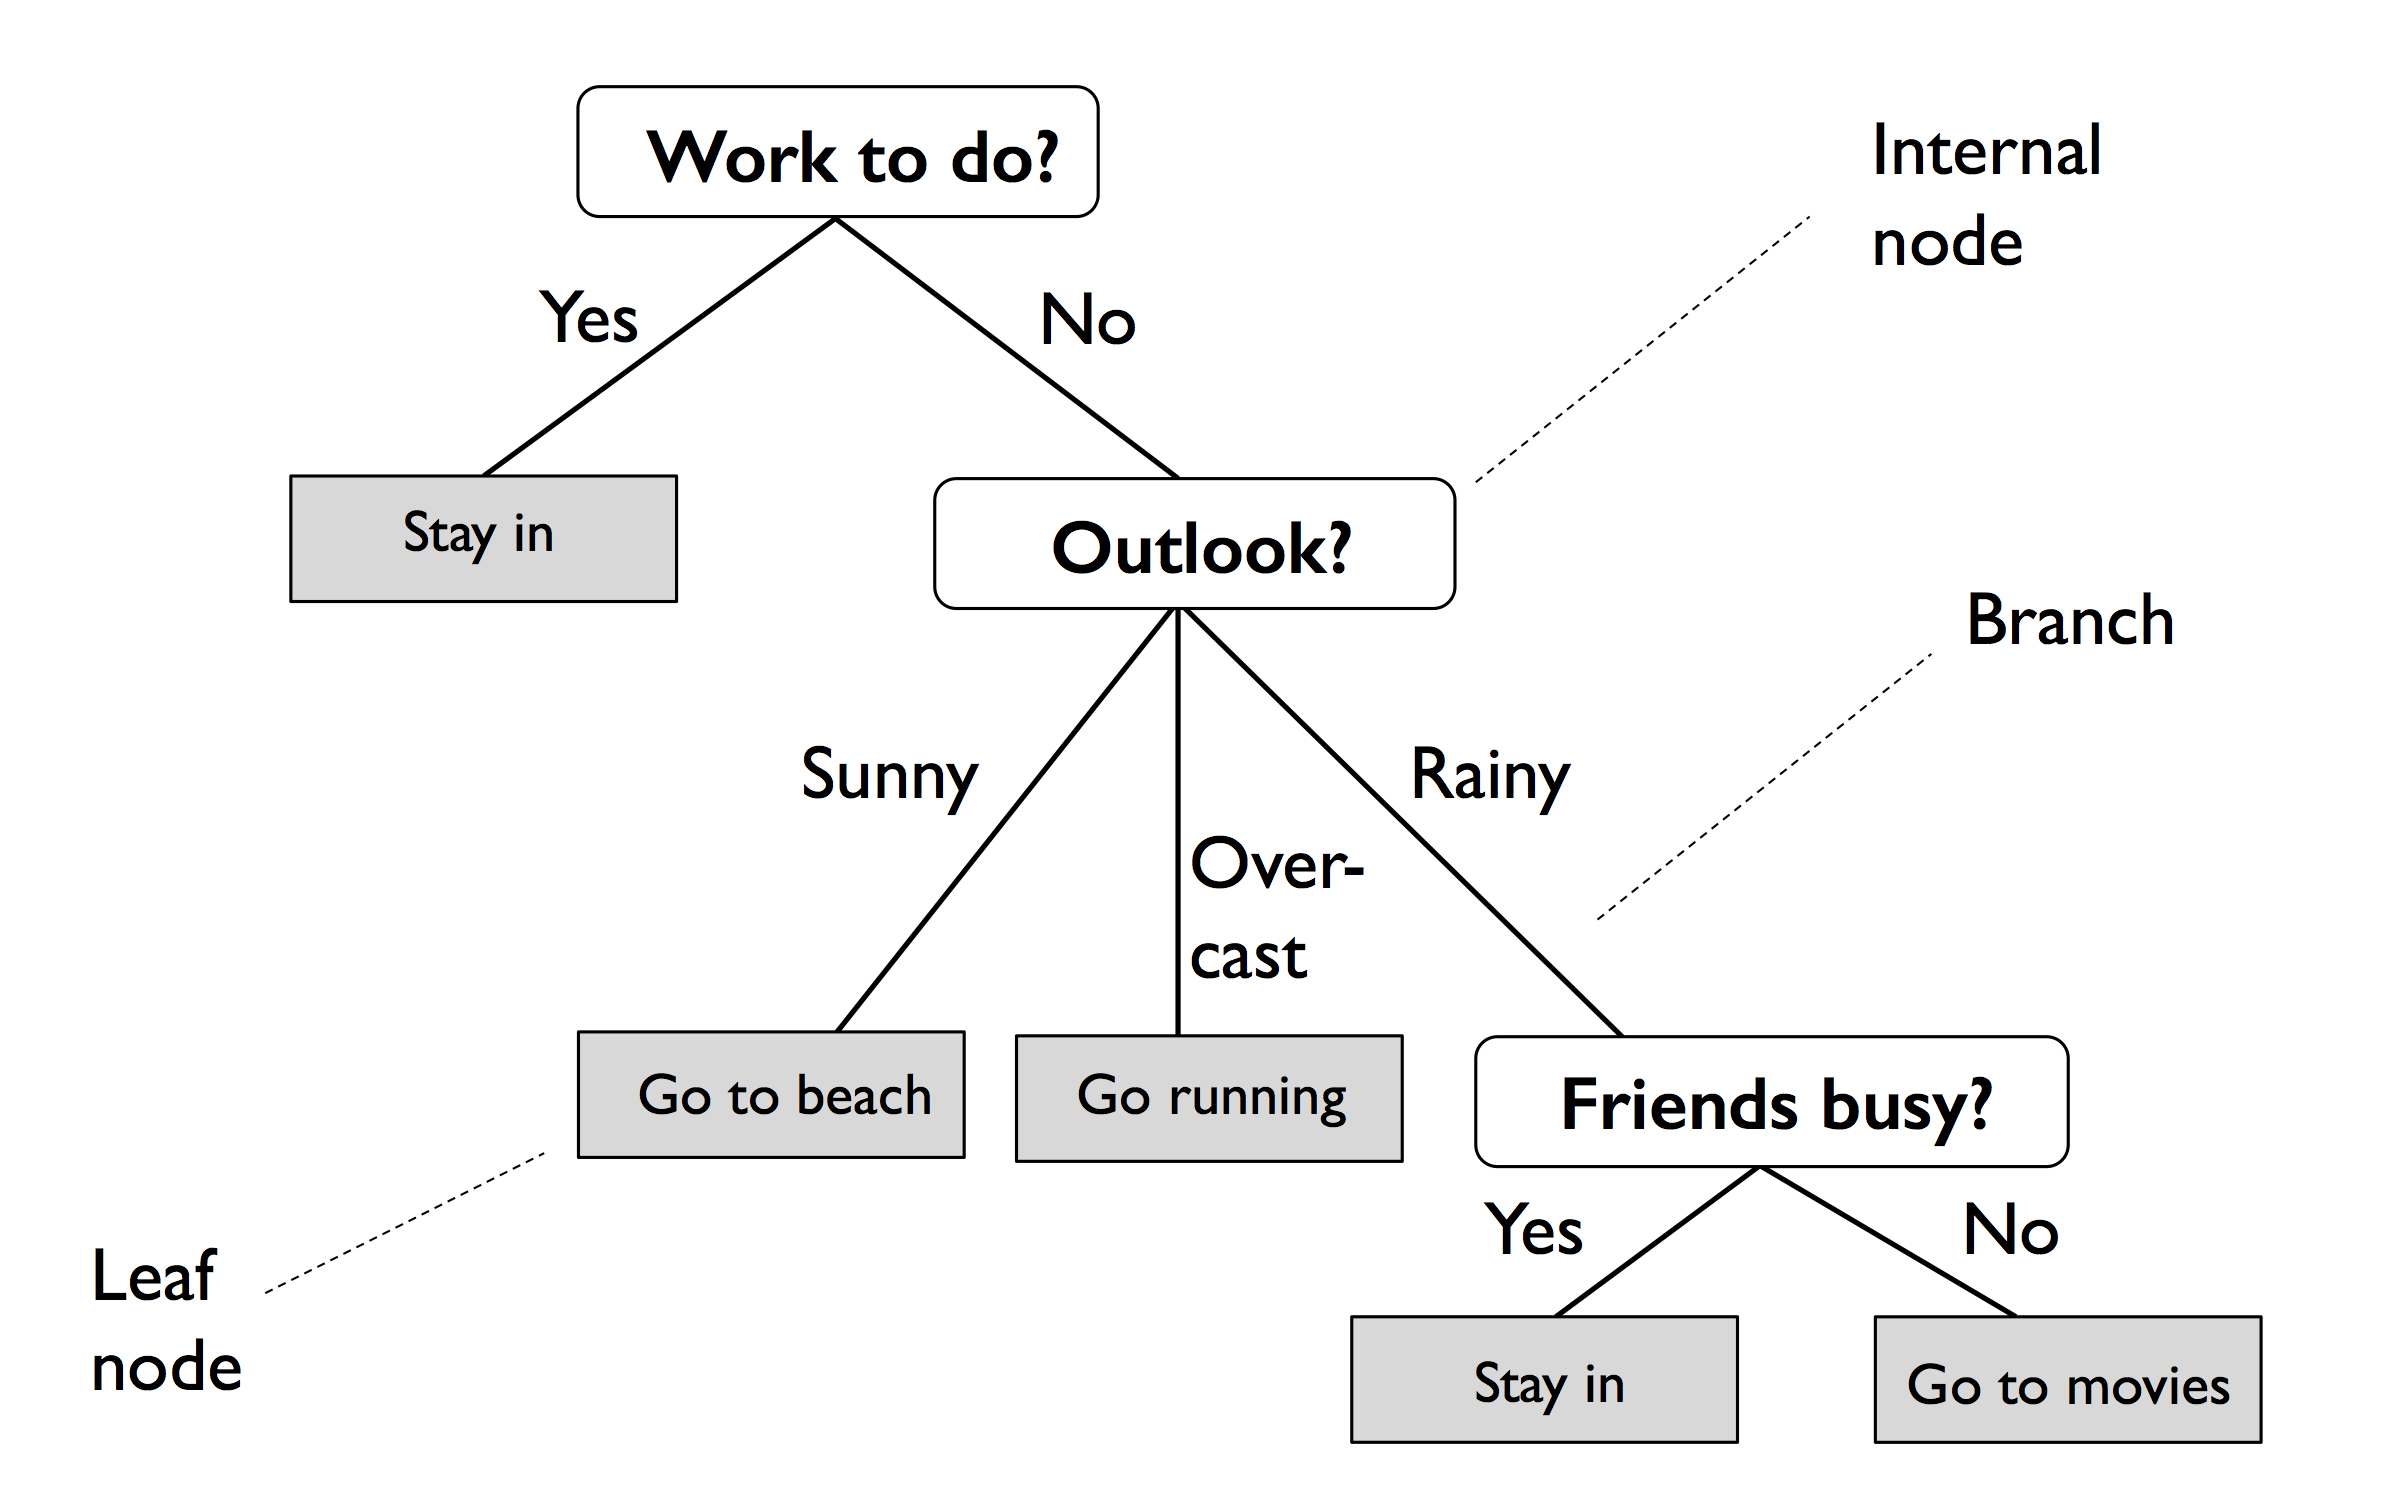

In [1]:
import pandas as pd
import seaborn as sns

iris = sns.load_dataset('iris')

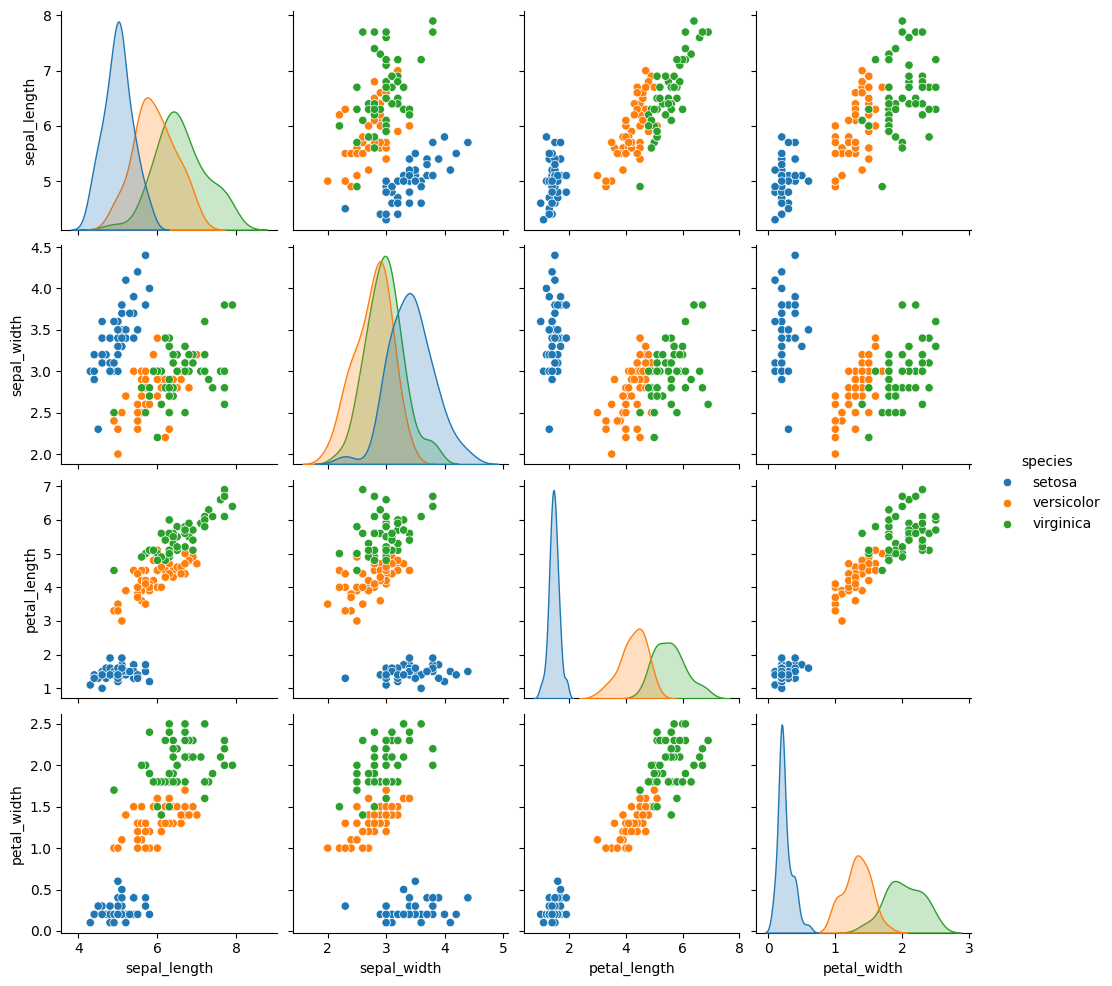

In [2]:
sns.pairplot(iris, hue='species')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# 모델을 feature와 lebel로 나눔
X=iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # Features
y=iris['species']  # Labels

In [5]:
# 데이터를 train, test set으로 나눔
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)

In [6]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=5)

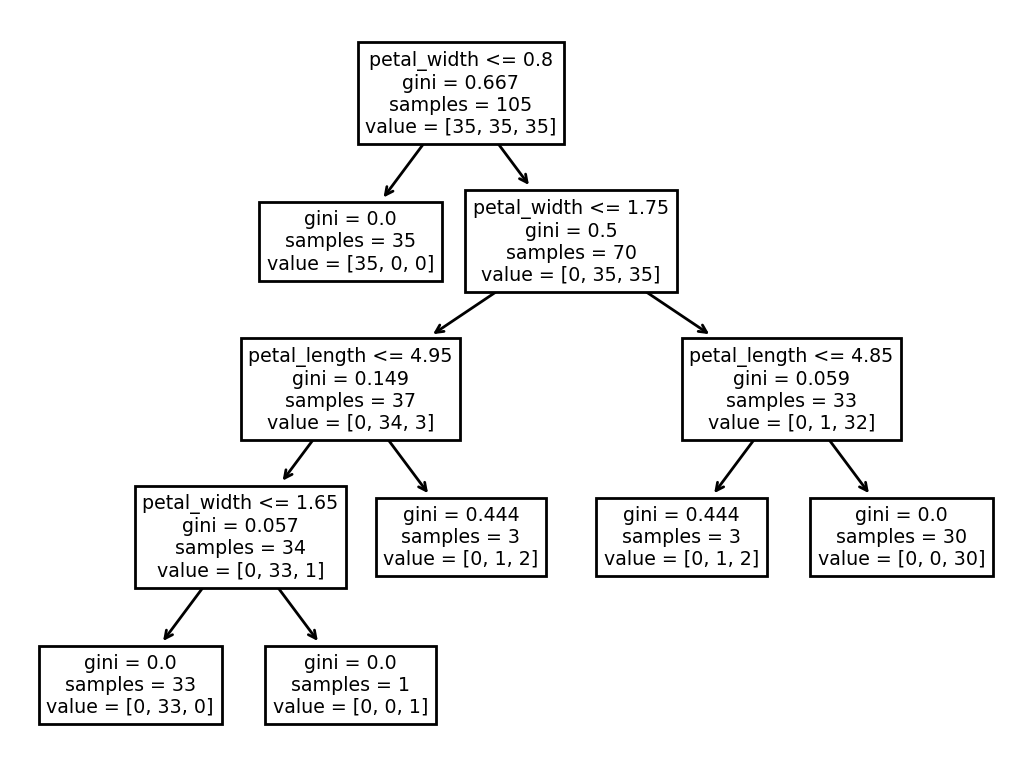

In [7]:
import matplotlib.pyplot as plt
plt.figure(dpi=200)
tree.plot_tree(clf, feature_names=X_train.columns)
plt.show()

In [8]:
dot_data = tree.export_graphviz(clf,feature_names=X_train.columns)

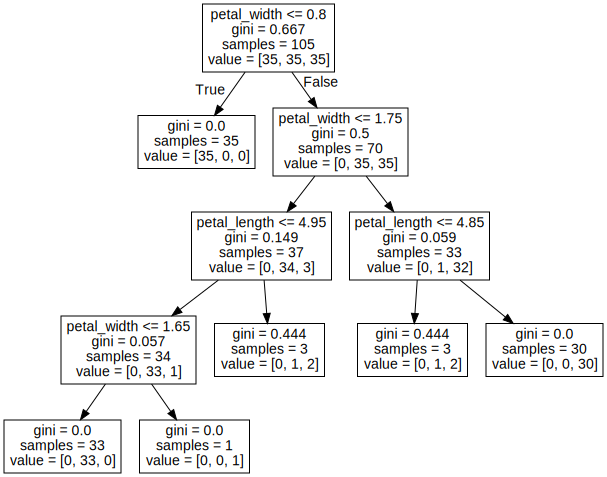

In [9]:
import graphviz
graph = graphviz.Source(dot_data)
graph

In [10]:
clf.predict(X_test)

array(['setosa', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'versicolor', 'virginica', 'virginica', 'setosa',
       'setosa', 'setosa', 'versicolor', 'virginica', 'setosa',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'setosa'],
      dtype=object)

In [11]:
y_pred = clf.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
cm

array([[1.        , 0.        , 0.        ],
       [0.        , 0.93333333, 0.06666667],
       [0.        , 0.        , 1.        ]])

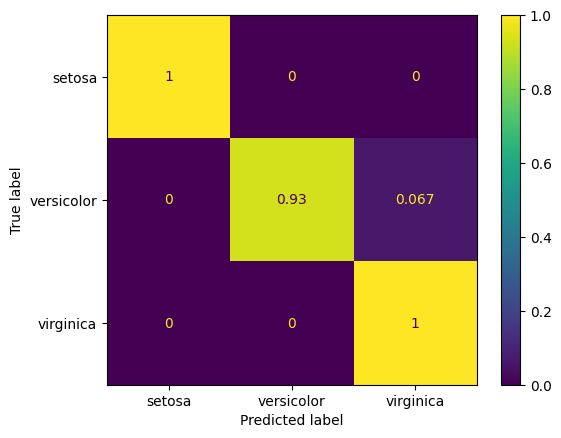

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()


In [ ]:
sklearn.metrics.